Abdul Saboor (20L-1113 | BDS-5A1)

### Pre-requisites

In [124]:
#importing ibraries to use
import pandas as pd
import numpy as np

In [125]:
data=pd.read_excel('my_iris.xlsx')

In [126]:
# checking data
data.describe()

,Unnamed: 0,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width
count,150.000000,130.000000,130.000000,130.000000,100.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.901538,3.005385,4.115385,1.453000,11.686667,-6.108000,15.034667,-4.794667
std,43.445368,0.835082,0.410013,1.621200,0.685117,1.656132,0.867189,7.057682,3.052643
min,0.000000,4.300000,2.000000,1.100000,0.100000,8.600000,-8.800000,4.000000,-10.000000
25%,37.250000,5.125000,2.800000,3.350000,1.100000,10.200000,-6.600000,6.400000,-7.200000
50%,74.500000,5.850000,3.000000,4.500000,1.500000,11.600000,-6.000000,17.400000,-5.200000
75%,111.750000,6.475000,3.200000,5.200000,2.000000,12.800000,-5.600000,20.400000,-1.200000
max,149.000000,7.900000,4.100000,6.900000,2.500000,15.800000,-4.000000,27.600000,-0.400000


# Data Cleaning

### Dropping redundant columns

In [127]:
data=data.drop([data.columns[0]],axis=1)
data.describe()

# Till now only first column is dropped as indexes of dataframe are duplicating with indexes of dataset.
#  So dropping index column will have no effect on data.

data=data.drop([data.columns[1]],axis=1) # sepal diameter is redundant
data=data.drop([data.columns[2]],axis=1) # petal diameter is redundant
data.head()

,sepal depth,petal depth,sepal length,sepal width,petal length,petal width,target
0,NaN,NaN,10.2,-7.0,5.6,-0.8,Iris-setosa
1,4.9,1.4,9.8,-6.0,5.6,-0.8,Iris-setosa
2,4.7,NaN,9.4,-6.4,5.2,-0.8,Iris-setosa
3,4.6,1.5,9.2,-6.2,6.0,-0.8,Iris-setosa
4,NaN,NaN,10.0,-7.2,5.6,-0.8,Iris-setosa


### Structuring and Standardising data

In [128]:
data['sepal width']=data['sepal width'].apply(lambda x: -1*x) # for sepal width
data['petal width']=data['petal width'].apply(lambda x: -1*x) # for petal width
data.describe()

# The column of sepal width and petal width have all negative values, however a measurement can not be negative. 
# This may be considered a human error and all values should be converted to positive values

,sepal depth,petal depth,sepal length,sepal width,petal length,petal width
count,130.000000,130.000000,150.000000,150.000000,150.000000,150.000000
mean,5.901538,4.115385,11.686667,6.108000,15.034667,4.794667
std,0.835082,1.621200,1.656132,0.867189,7.057682,3.052643
min,4.300000,1.100000,8.600000,4.000000,4.000000,0.400000
25%,5.125000,3.350000,10.200000,5.600000,6.400000,1.200000
50%,5.850000,4.500000,11.600000,6.000000,17.400000,5.200000
75%,6.475000,5.200000,12.800000,6.600000,20.400000,7.200000
max,7.900000,6.900000,15.800000,8.800000,27.600000,10.000000


### Filling missing values

In [129]:
# for petal depth column
temp=pd.DataFrame({'original':data['petal depth'],'interpolation':data['petal depth'].interpolate(),'mean':data['petal depth'].fillna(data['petal depth'].mean()),'median':data['petal depth'].fillna(data['petal depth'].median())})
temp.describe()

,original,interpolation,mean,median
count,130.000000,149.000000,150.000000,150.000000
mean,4.115385,3.780201,4.115385,4.166667
std,1.621200,1.751021,1.508475,1.514169
min,1.100000,1.100000,1.100000,1.100000
25%,3.350000,1.600000,3.825000,3.825000
50%,4.500000,4.400000,4.350000,4.500000
75%,5.200000,5.100000,5.100000,5.100000
max,6.900000,6.900000,6.900000,6.900000


In [130]:
# for sepal depth column
temp=pd.DataFrame({'original':data['sepal depth'],'interpolation':data['sepal depth'].interpolate(),'mean':data['sepal depth'].fillna(data['sepal depth'].mean()),'median':data['sepal depth'].fillna(data['sepal depth'].median())})
temp.describe()

,original,interpolation,mean,median
count,130.000000,149.000000,150.000000,150.000000
mean,5.901538,5.830537,5.901538,5.894667
std,0.835082,0.826886,0.777018,0.777216
min,4.300000,4.300000,4.300000,4.300000
25%,5.125000,5.100000,5.400000,5.400000
50%,5.850000,5.800000,5.901538,5.850000
75%,6.475000,6.400000,6.400000,6.400000
max,7.900000,7.900000,7.900000,7.900000


In [131]:
data['petal depth']=data['petal depth'].fillna(data['petal depth'].median())
data['sepal depth']=data['sepal depth'].fillna(data['sepal depth'].median())

# Here replacing missing values with median over mean or interpolation is preferred after comparing the results
# of all three approaches. It can be observed that replacing with median values creates minimum possible distortion 
# in data as both mean and median deviate by minimum in this case.
data.describe()

,sepal depth,petal depth,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.894667,4.166667,11.686667,6.108000,15.034667,4.794667
std,0.777216,1.514169,1.656132,0.867189,7.057682,3.052643
min,4.300000,1.100000,8.600000,4.000000,4.000000,0.400000
25%,5.400000,3.825000,10.200000,5.600000,6.400000,1.200000
50%,5.850000,4.500000,11.600000,6.000000,17.400000,5.200000
75%,6.400000,5.100000,12.800000,6.600000,20.400000,7.200000
max,7.900000,6.900000,15.800000,8.800000,27.600000,10.000000


### Outlier Detection and Removal

<AxesSubplot:>

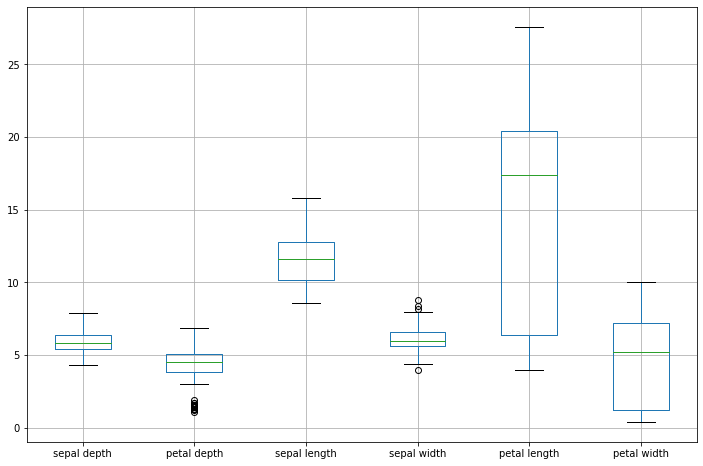

In [132]:
data.boxplot(figsize=(12,8))

# Here box and whisker plot is used to visualize any outliers present in the data.

In [133]:
# applying log transformation
data['sepal depth'] = np.log10(data['sepal depth'])
data['petal depth'] = np.log10(data['petal depth'])
data.describe()

,sepal depth,petal depth,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.766711,0.577021,11.686667,6.108000,15.034667,4.794667
std,0.057337,0.215248,1.656132,0.867189,7.057682,3.052643
min,0.633468,0.041393,8.600000,4.000000,4.000000,0.400000
25%,0.732394,0.582604,10.200000,5.600000,6.400000,1.200000
50%,0.767156,0.653213,11.600000,6.000000,17.400000,5.200000
75%,0.806180,0.707570,12.800000,6.600000,20.400000,7.200000
max,0.897627,0.838849,15.800000,8.800000,27.600000,10.000000


In [134]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [135]:
# After performing log transformation or outlier removal on this data, Log tranformation seems a much better 
# approach in this case as it does not reduce the size of data while minimizing the outliers.

<AxesSubplot:>

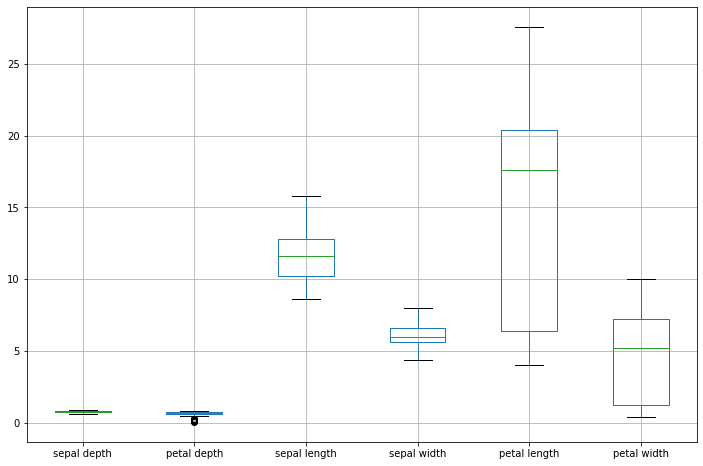

In [136]:
data=remove_outlier(data,"sepal width")
data.boxplot(figsize=(12,8))

### Correlation and removing correlated columns

<AxesSubplot:>

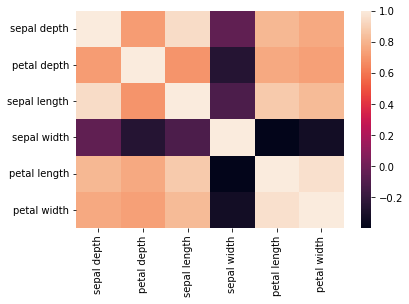

In [139]:
import seaborn as sns
sns.heatmap(data.corr())

In [138]:
# Judging by this heatmap, we can see that most of the areas in heat map are towards darker side of gradient.
# However sepal depth is very highly correlated to sepal length. In addition to that petal depth is also highly 
# related to petal length and width adn is also presenting outliers in data so we can remove these columns form data.

In [140]:
data=data.drop(['sepal depth','petal depth'],axis=1)
data.describe()

,sepal length,sepal width,petal length,petal width
count,146.000000,146.000000,146.000000,146.000000
mean,11.713699,6.073973,15.230137,4.879452
std,1.668186,0.790291,7.028468,3.041459
min,8.600000,4.400000,4.000000,0.400000
25%,10.200000,5.600000,6.400000,1.200000
50%,11.600000,6.000000,17.600000,5.200000
75%,12.800000,6.600000,20.400000,7.200000
max,15.800000,8.000000,27.600000,10.000000


<AxesSubplot:>

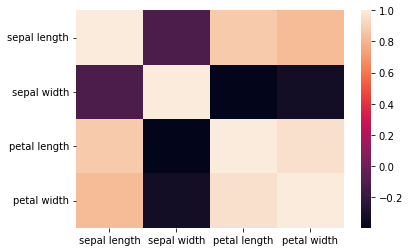

In [141]:
# here is final form of data
sns.heatmap(data.corr())

In [143]:
#exporting all data to an excel file for further use
data.to_excel('cleaned data.xlsx')